In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import scipy.stats as sps
import statistics

## Распределение Эрланга
Пусть 𝑋 — класс, реализующий некоторое распределение. Конкретное распределение с параметрами params можно получить как X(params). У него доступны следующие методы:
    
    X(params).rvs(size=N) — генерация выборки размера 𝑁 (Random VariateS). Возвращает numpy.array;
    X(params).cdf(x) — значение функции распределения в точке 𝑥 (Cumulative Distribution Function);
    X(params).logcdf(x) — значение логарифма функции распределения в точке 𝑥;
    X(params).ppf(q) — 𝑞-квантиль (Percent Point Function);
    X(params).mean() — математическое ожидание;
    X(params).median() — медиана (1/2-квантиль);
    X(params).var() — дисперсия (Variance);
    X(params).std() — стандартное отклонение = корень из дисперсии (Standard Deviation).

Кроме того для непрерывных распределений определены функции

    X(params).pdf(x) — значение плотности в точке 𝑥(Probability Density Function);
    X(params).logpdf(x) — значение логарифма плотности в точке 𝑥

А для дискретных

    X(params).pmf(k) — значение дискретной плотности в точке 𝑘(Probability Mass Function);
    X(params).logpdf(k) — значение логарифма дискретной плотности в точке 𝑘

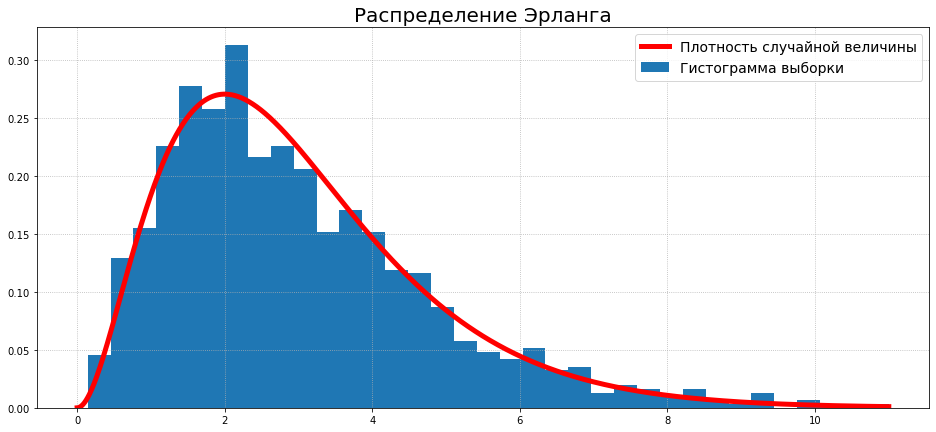

In [72]:
#Данные по распределению Эрланга - http://statistica.ru/theory/raspredelenie-erlanga/

a = 3 #необходимый для распределения Эрланга параметр

sample_erl = sps.erlang(a).rvs(size=1000)  # выборка размера 1000
grid = np.linspace(0, 11, 1000) #сетка для построения графика

plt.figure(figsize=(16, 7))
plt.hist(sample_erl, bins=35, density=True, label='Гистограмма выборки') #гистрограмма распределения
plt.plot(grid, sps.erlang(a).pdf(grid), color='red', lw=5, label='Плотность случайной величины') #функция плотности распределения
plt.title('Распределение Эрланга', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.grid(ls=':')
plt.show()

mean = sample_erl.mean()#математическое ожидание выборки
var = sample_erl.var()#дисперсия выборки


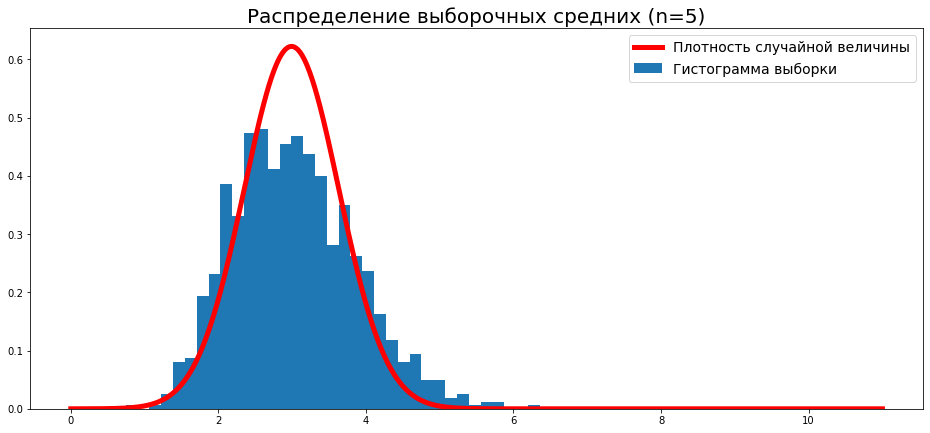

In [73]:
#Создание выборок объема n
def create_sample(sample, n):
    a = (1000, n)
    s = np.zeros(a)
    for i in range(1000):
        s[i, :] = np.random.choice(sample, size = n, replace = True)      
    return s 

#Расчет выборочного среднего для выборки
def sample_average(sample):
    avg = []
    for i in range(1000):    
        avg.append(statistics.mean(sample[i, :]))
    return avg

def hist(sample, n, mean_1, var_1):
    sps.norm()
    plt.figure(figsize=(16, 7))
    plt.hist(sample, bins=n+30, density=True, lw = 5, label='Гистограмма выборки')
    #По ЦПТ математическое ожидание новой выборки равно исходному, а дисперсия равна исходной дисперсии деленной на n
    plt.plot(grid, sts.norm(mean_1, var_1/n).pdf(grid),color='red', lw=5, label='Плотность случайной величины') 
    plt.title("Распределение выборочных средних (n=%i)" %n,fontsize=20)
    plt.legend(fontsize=14, loc=1)
    plt.show()

#Создание графиков по выборке n = 5
sample_5 =create_sample(sample_erl, 5)
sample_5 = sample_average(sample_5)
hist(sample_5, 5, mean, var)


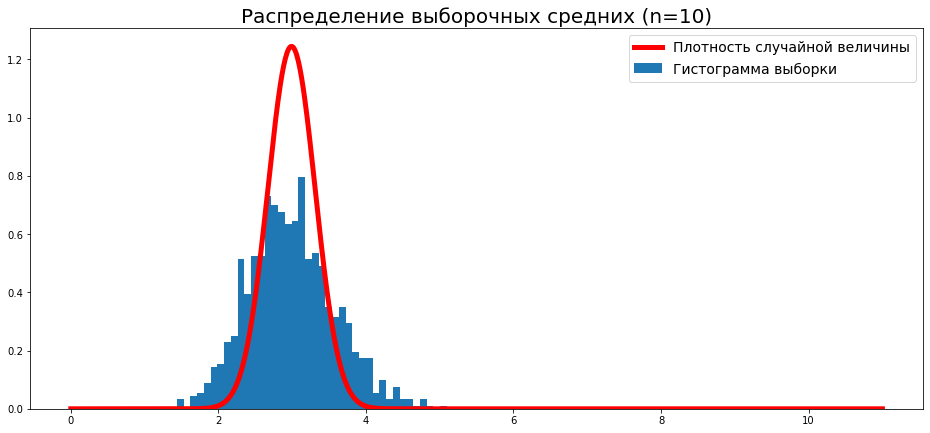

In [74]:
#Создание графиков по выборке n = 10
sample_10 =create_sample(sample_erl , 10)
sample_10 = sample_average(sample_10)
hist(sample_10, 10, mean, var)

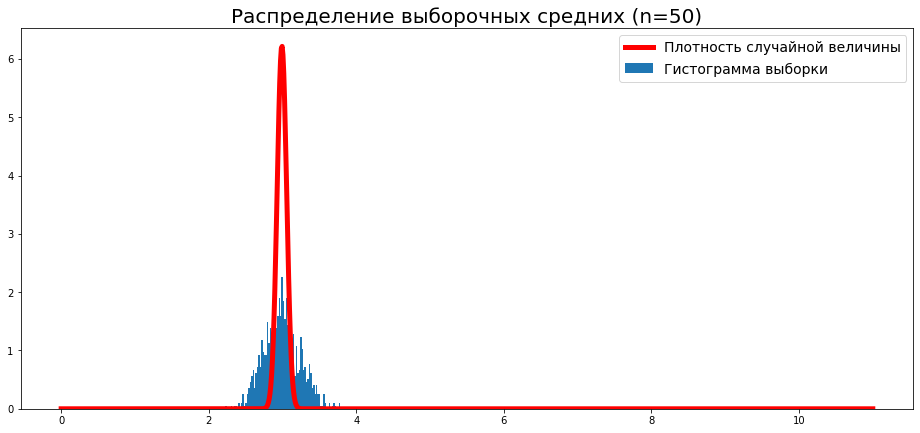

In [75]:
#Создание графиков по выборке n = 50
sample_50 =create_sample(sample_erl, 50)
sample_50 = sample_average(sample_50)
hist(sample_50, 50, mean, var)

## Выводы:
    Под действием центральной предельной теоремы, выборка из исходного распределения Эрланга при n = 5 существенно отличается и имеет вид нормального распределения.
    
    При увеличении объема n распределение представляется более узким графиком.
